In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
WTP = "$WTP_{i,w}$"

In [8]:
evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv")
price_matrix = pd.read_csv("price_matrix.csv")

## Event History

In [ ]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.scatterplot(x="t", y="customer", data=event_history, hue="event", ax=ax)
ax.grid(axis="y")
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(
    plt.MultipleLocator(0.5)
)
ax.grid(True, axis="y", which="minor")
ax.grid(False, axis="y", which="major")
plt.show()

/home/laurinbrechter/.local/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


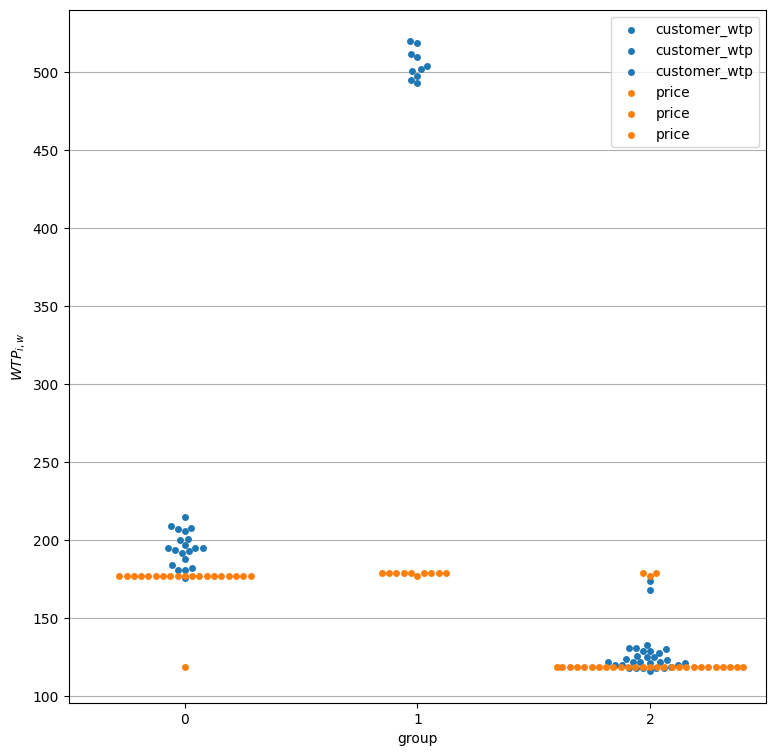

In [8]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]
fig, ax = plt.subplots(figsize=(9, 9))
sns.swarmplot(x="group", y="customer_wtp", data=quit_sold, ax=ax, label="customer_wtp")
sns.swarmplot(x="group", y="price", data=quit_sold, ax=ax, label="price")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

In [9]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]

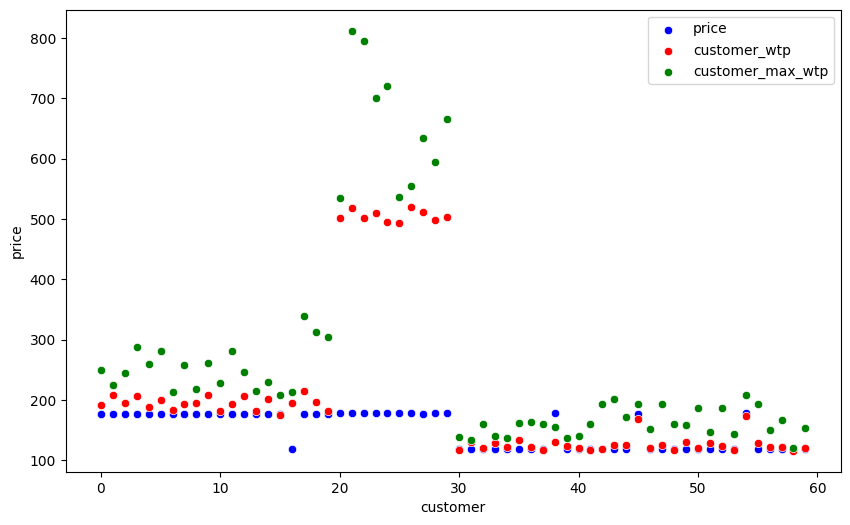

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="customer", y="price", data=quit_sold, color='blue', label='price', ax=ax)
sns.scatterplot(
    x="customer", y="customer_wtp", data=quit_sold, color='red', label='customer_wtp', ax=ax
)
sns.scatterplot(
    x="customer", y="customer_max_wtp", data=quit_sold, color='green', label='customer_max_wtp', ax=ax
)
plt.legend()

## ES performance population and offspring

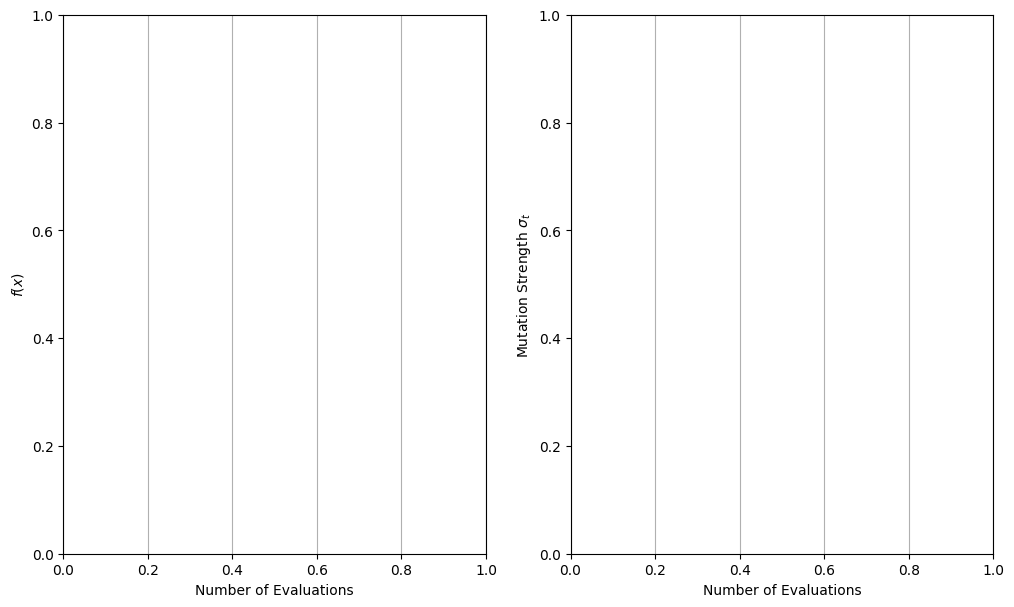

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
sns.scatterplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["run_id"] == 1],
    hue="type",
    ax=axs[0],
)

sns.lineplot(
    x="n_evals",
    y="mutation_strength",
    data=evolution_log.loc[(evolution_log["type"] == "population") & (evolution_log["run_id"] == 1)],
    ax=axs[1],
)

# ax.legend()
axs[0].set_ylabel("$f(x)$")
axs[0].grid(axis="x")
axs[1].grid(axis="x")
axs[0].set_xlabel("Number of Evaluations")
axs[1].set_xlabel("Number of Evaluations")

axs[1].set_ylabel("Mutation Strength $\sigma_t$")
plt.show()

### rechenberg vs none

Text(0.5, 0, 'Number of Evaluations')

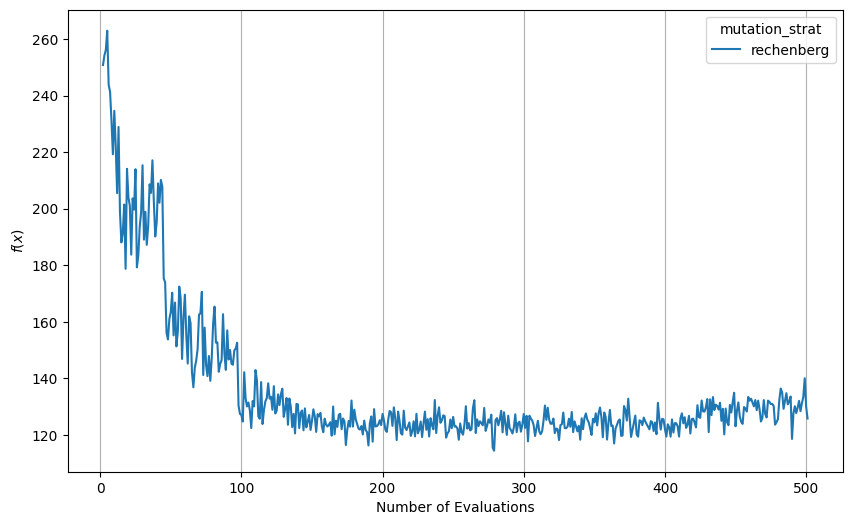

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

res = evolution_log.groupby(["n_evals", "mutation_strat", "run_id"]).agg(
    {"avg_regret": "mean"}
).reset_index()

sns.lineplot(x="n_evals", y="avg_regret", data=res, hue="mutation_strat", ax=ax)

ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
ax.set_xlabel("Number of Evaluations")

## Customer Init

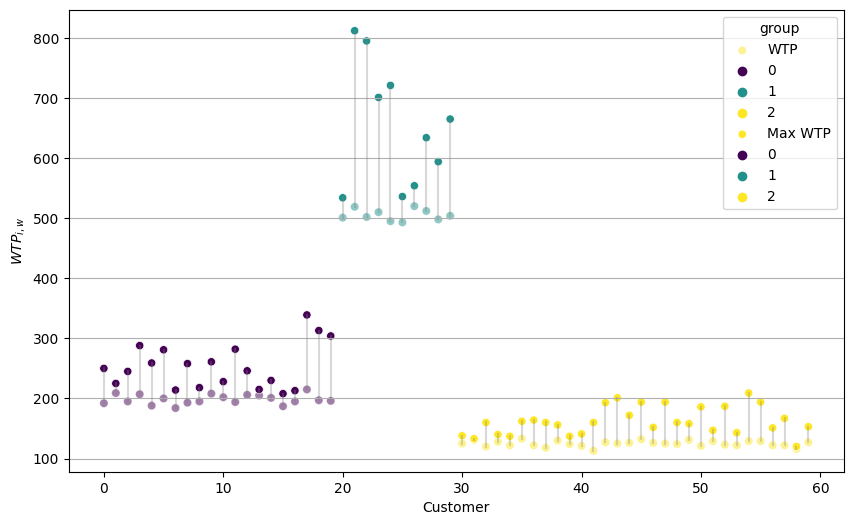

In [13]:
customers = event_history.drop_duplicates(subset=["customer"])

fig, ax = plt.subplots(figsize=(10, 6))

# First plot the scatter points
sns.scatterplot(
    x="customer",
    y="customer_wtp",
    data=customers,
    hue="group",
    label="WTP",
    palette="viridis",
    alpha=0.5,
)
sns.scatterplot(
    x="customer",
    y="customer_max_wtp",
    data=customers,
    hue="group",
    label="Max WTP",
    palette="viridis",
    alpha=1,
)

# Add lines connecting the points for each customer
for _, customer in customers.iterrows():
    ax.plot(
        [customer.customer, customer.customer],
        [customer.customer_wtp, customer.customer_max_wtp],
        color="gray",
        alpha=0.3,
        linestyle="-",
    )

ax.set_xlabel("Customer")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

## WTP changes

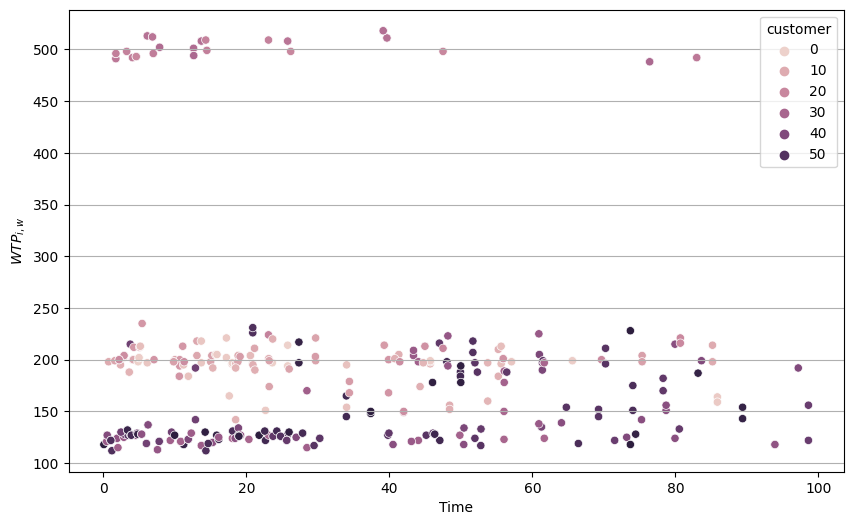

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="t", y="erp", data=event_history, hue="customer")
ax.set_xlabel("Time")
ax.set_ylabel(WTP)
ax.grid(axis="y")
plt.show()

# Price Matrix

<Axes: xlabel='visit', ylabel='price'>

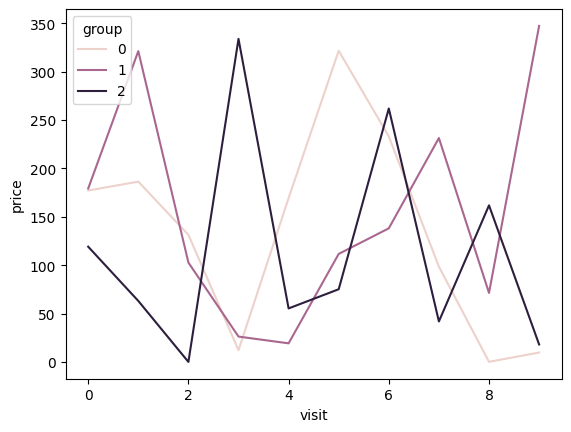

In [15]:
sns.lineplot(data=price_matrix, x='visit', hue='group', y='price')

<Axes: xlabel='visit', ylabel='group'>

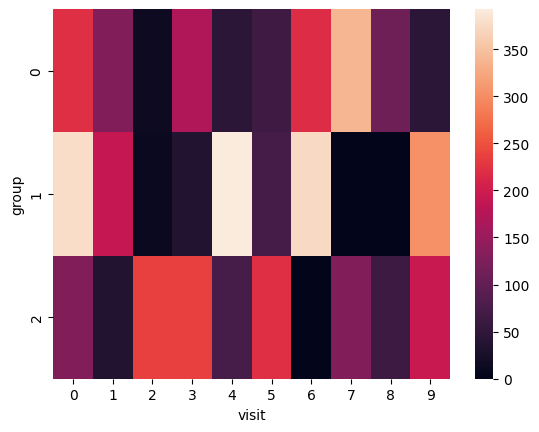

In [79]:
sns.heatmap(price_matrix.pivot(index="group", columns="visit", values="price"))

# Sensitivity Analysis

## Comma vs Plus

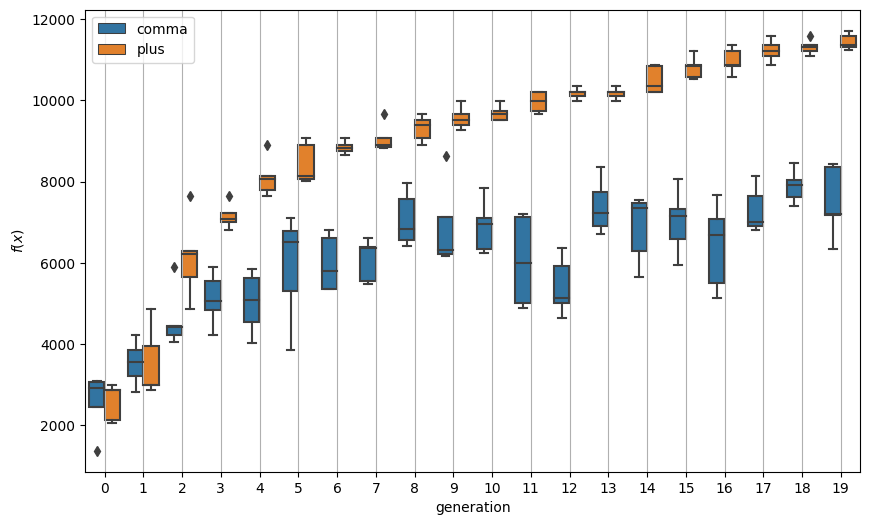

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x="generation",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="selection",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

## Steady State ES

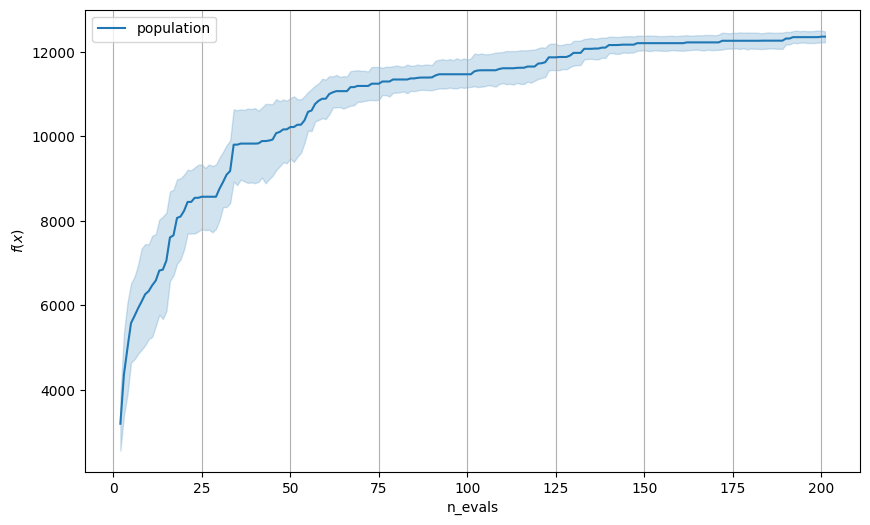

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

<Axes: xlabel='n_evals', ylabel='mutation_strength'>

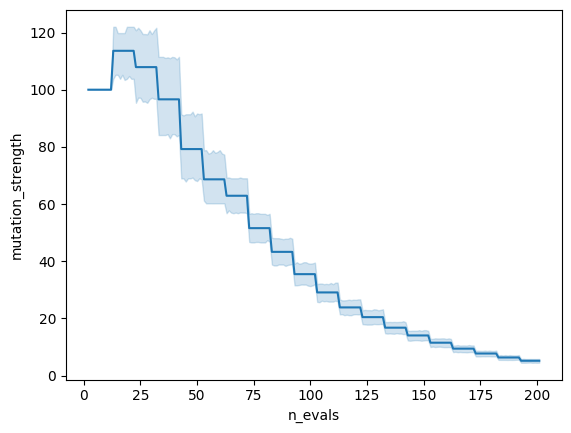

In [28]:
sns.lineplot(
    x="n_evals",
    y="mutation_strength",
    data=evolution_log.loc[evolution_log["type"] == "population"],
)

In [21]:
evolution_log

,run_id,generation,n_evals,type,individual,score,lambda,mu,p,selection,mutation_probability,mutation_strength
0,0,0,2,population,0,4434.277152,1,1,1,plus,1,100.00000
1,0,0,2,offspring,1,7394.089949,1,1,1,plus,1,100.00000
2,0,1,3,population,1,7394.089949,1,1,1,plus,1,100.00000
3,0,1,3,offspring,2,7718.668553,1,1,1,plus,1,100.00000
4,0,2,4,population,2,7718.668553,1,1,1,plus,1,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,9,197,199,offspring,198,11075.762711,1,1,1,plus,1,3.42775
3996,9,198,200,population,100,12750.699608,1,1,1,plus,1,3.42775
3997,9,198,200,offspring,199,9862.879960,1,1,1,plus,1,3.42775
3998,9,199,201,population,100,12750.699608,1,1,1,plus,1,3.42775


# MAB

In [31]:
mab_log = pd.read_csv("mab_log.csv")

In [32]:
mab_log.loc[mab_log["group"] == 0]

,t,group,visit,price,reward,last_action
0,0,0,0,277,277,random
2,0,0,0,55,55,random
4,1,0,0,277,0,best
8,3,0,0,333,0,random
12,4,0,0,277,0,best
14,4,0,0,277,0,best
16,5,0,0,277,0,best
20,7,0,0,277,0,best
22,9,0,0,277,0,best
26,10,0,0,277,0,best


In [11]:
event_history.loc[event_history["event"] == "sold"].groupby('loss_aversion').agg({'price': 'mean'})

,price
loss_aversion,
2.25,196.444444
5.00,167.929825
